# libraries and data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import datetime
from tqdm import tqdm
tqdm.pandas()

sns.set(color_codes=True)
plt.style.use('bmh')
pd.set_option('display.max_columns', None)

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
# !python -m spacy download en_core_web_lg
spacy.load('en_core_web_lg')

In [3]:
csv_df = pd.read_csv('2021-all-Ads-tweets.csv')
tweets = csv_df.copy()

/Users/meag/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweets.describe(include='all')

,_id,Ad Name,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorited,filter_level,geo,id,in_reply_to_screen_name,is_quote_status,lang,matching_rules,place,possibly_sensitive,quoted_status,quoted_status_permalink,retweeted,retweeted_status,scopes,Sheet,source,Table Name1,text,truncated,user,F1,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quote_count,quoted_status_id,quoted_status_id_str,reply_count,retweet_count
count,1135050,1135050,0.0,116,1135050,295209,1135050,157372,237591,1135050,1135050,116,1.135050e+06,319370,1135050,1135050,1135050,16937,379516,61452,61452,1135050,540357,146008,1135050,1134239,1135050,1135050,1135050,1135050,1.135050e+06,1.135050e+06,1.135050e+06,2.350860e+05,2.350860e+05,3.193700e+05,3.193700e+05,1.135050e+06,6.161400e+04,6.161400e+04,1.135050e+06,1.135050e+06
unique,1122991,64,NaN,92,18000,6826,397023,37804,202974,1,1,92,NaN,129788,2,50,1,3445,2,11579,33029,1,46471,1,64,1388,3,544467,2,536035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6020fe4c9e1aa8e3e7afac49,Disney - Falcon_Winter_Soldier,NaN,"{'type': 'Point', 'coordinates': [-98.57040346...",Mon Feb 08 02:15:41 +0000 2021,"[17, 140]","{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1358571259907497988, 'id_str...",{'full_text': '#TheClimb ALL DAY! That song is...,False,low,"{'type': 'Point', 'coordinates': [29.46998498,...",NaN,MountainDew,False,en,[{'tag': None}],"{'id': '3b77caf94bfc81fe', 'url': 'https://api...",False,{'created_at': 'Mon Feb 08 02:03:09 +0000 2021...,"{'url': 'https://t.co/sSzQZYFRz9', 'expanded':...",False,{'created_at': 'Mon Feb 08 01:06:23 +0000 2021...,{'followers': False},Disney - Falcon!Winter!Soldier,"<a href=""http://twitter.com/download/iphone"" r...",brand13-25.csv,RT @TMobile: Don't trust big decisions to just...,False,"{'id': 1334184593847508992, 'id_str': '1334184...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,180126,NaN,6,249,13269,85684,7231,254,1135050,1135050,6,NaN,15573,1073395,995992,1135050,382,367331,1276,2120,1135050,17675,146008,180126,526140,434953,53865,897459,25060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358593e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.824255e+04,3.332647e+00,1.358593e+18,1.358289e+18,1.358290e+18,3.228961e+17,3.228961e+17,1.138708e-01,1.356944e+18,1.356944e+18,2.403365e-01,5.272975e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924884e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.274728e+04,1.845935e+02,1.924884e+13,1.098116e+16,1.098116e+16,5.077212e+17,5.077212e+17,1.850462e+01,2.625081e+16,2.625081e+16,7.571552e+00,6.248504e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358559e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.358559e+18,1.527430e+10,1.527429e+10,1.200000e+01,1.200000e+01,0.000000e+00,1.311703e+09,1.311703e+09,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358578e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065000e+03,0.000000e+00,1.358578e+18,1.358573e+18,1.358573e+18,7.646771e+07,7.646771e+07,0.000000e+00,1.358518e+18,1.358518e+18,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358592e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414800e+04,0.000000e+00,1.358592e+18,1.358587e+18,1.358586e+18,1.046536e+09,1.046536e+09,0.000000e+00,1.358572e+18,1.358572e+18,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358609e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.320375e+04,0.000000e+00,1.358609e+18,1.358600e+18,1.358601e+18,8.095330e+17,8.095330e+17,0.000000e+00,1.358586e+18,1.358586e+18,0.000000e+00,0.000000e+00


In [4]:
tweets.drop(['contributors', 'coordinates', 'geo'], axis=1)

,_id,Ad Name,created_at,display_text_range,entities,extended_entities,extended_tweet,favorited,filter_level,id,in_reply_to_screen_name,is_quote_status,lang,matching_rules,place,possibly_sensitive,quoted_status,quoted_status_permalink,retweeted,retweeted_status,scopes,Sheet,source,Table Name1,text,truncated,user,F1,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quote_count,quoted_status_id,quoted_status_id_str,reply_count,retweet_count
0,602105519e1aa8e3e7ba582a,SpaceX - Inspiration4,Mon Feb 08 01:56:10 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,1358595446336146944,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 02:40:31 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @ValaAfshar: When something is important en...,False,"{'id': 1166012424215883776, 'id_str': '1166012...",1658,0,1358595446336147456,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
1,602105519e1aa8e3e7ba582b,SpaceX - Inspiration4,Mon Feb 08 01:56:08 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,1358595436613946880,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 1125223219902939137, 'id_str': '1125223...",1659,0,1358595436613947393,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
2,602105519e1aa8e3e7ba582c,SpaceX - Inspiration4,Mon Feb 08 01:56:01 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,1358595407484363008,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sat Feb 06 17:40:49 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @RealLifeStarman: History will look back at...,False,"{'id': 3278553494, 'id_str': '3278553494', 'na...",1660,0,1358595407484362753,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
3,602105519e1aa8e3e7ba582d,SpaceX - Inspiration4,Mon Feb 08 01:56:00 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,1358595404804354048,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 4109528079, 'id_str': '4109528079', 'na...",1661,0,1358595404804354050,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
4,6020fa259e1aa8e3e7a9e8d9,Anheuser_busch - Anheuser_Busch,Mon Feb 08 00:05:05 +0000 2021,"[15, 53]","{'hashtags': [{'text': 'JoyWins', 'indices': [...",NaN,NaN,False,low,1358567489857330944,MichelobULTRA,False,ca,[{'tag': None}],NaN,NaN,NaN,NaN,False,NaN,NaN,Anheuser!busch - Anheuser!Busch,"<a href=""https://mobile.twitter.com"" rel=""nofo...",brand26-64.csv,@MichelobULTRA Super Bowl XXXV #JoyWins #Swee...,False,"{'id': 392759040, 'id_str': '392759040', 'name...",15420,0,1358567489857331204,1.357420e+18,1.357419e+18,1.447153e+09,1.447153e+09,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135045,6021003d9e1aa8e3e7b2b281,Amazon - mbj,Mon Feb 08 03:08:21 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,1358613611904655104,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,NaN,NaN,Amazon - mbj,"<a href=""http://twitter.com/download/iphone"" r...",brand26-64.csv,The alexa commercial tho 🔥,False,"{'id': 357990671, 'id_str': '357990671', 'name...",7027,0,1358613611904655363,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0
1135046,6021003d9e1aa8e3e7b2b282,Amazon - mbj,Mon Feb 08 03:08:21 +0000 2021,NaN,"{'hashtags': [{'text': 'AlexasNewBody', 'indic...",NaN,NaN,False,low,1358613611896335872,NaN,Fa

# NLTK

In [13]:
from pprint import pprint
import nltk
nltk.download([
    "names",
    "stopwords",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

[nltk_data] Downloading package names to /Users/meag/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/meag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/meag/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/meag/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/meag/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meag/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/meag/nltk_data...
[nltk_data]   Package punkt is already up-to-da

True

In [14]:
import string
import re

In [21]:
# stopwords = nltk.corpus.stopwords.words("english")

# def remove_punct(text):
#     text = "".join([char for char in text if char not in string.punctuation])
#     text = re.sub('[0-9]+', '',text)
#     return text


In [22]:
# tweets['noPunct'] = tweets['text'].progress_apply(lambda x: remove_punct(x))

# tweets['tokens'] = tweets['noPunct'].progress_apply(lambda x: nltk.word_tokenize(x))


100%|██████████| 1135050/1135050 [02:19<00:00, 8129.04it/s]


In [23]:
# def remove_stopwords(text):
#     text = [word for word in text if word not in stopwords]
#     return text

# tweets['tokens_noStop'] = tweets['tokens'].progress_apply(lambda x: remove_stopwords(x))

100%|██████████| 1135050/1135050 [00:34<00:00, 32696.96it/s]


In [25]:
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# tweets['stemmed'] = tweets['tokens_noStop'].progress_apply(lambda x: stemming(x))


100%|██████████| 1135050/1135050 [04:10<00:00, 4539.19it/s]


In [28]:
# nltk.download('wordnet')
# wn = nltk.WordNetLemmatizer()

# def lemmatizer(text):
#     text = [wn.lemmatize(word) for word in text]
#     return text

# tweets['lemmed'] = tweets['tokens_noStop'].progress_apply(lambda x: lemmatizer(x))
                                                          

[nltk_data] Downloading package wordnet to /Users/meag/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
100%|██████████| 1135050/1135050 [00:54<00:00, 20992.56it/s]


In [ ]:
emo_happy = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
emo_sad = r" (:'?[/|\(]) "
stopwords = nltk.corpus.stopwords.words("english")
ps = nltk.PorterStemmer()
    
    

In [39]:
tweets['isRT'] = tweets['text'].progress_apply(lambda x: True if x.startswith('RT') else False)

100%|██████████| 1135050/1135050 [00:01<00:00, 999969.91it/s] 


this was to test....

In [87]:
tweets.head()

# contributors 	coordinates


,_id,Ad Name,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorited,filter_level,geo,id,in_reply_to_screen_name,is_quote_status,lang,matching_rules,place,possibly_sensitive,quoted_status,quoted_status_permalink,retweeted,retweeted_status,scopes,Sheet,source,Table Name1,text,truncated,user,F1,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quote_count,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,clean,isRT,clean_tokens,wordcloud2,wordcloud,textBlob,polarity,sentSubjectivity
0,602105519e1aa8e3e7ba582a,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:10 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595446336146944,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 02:40:31 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @ValaAfshar: When something is important en...,False,"{'id': 1166012424215883776, 'id_str': '1166012...",1658,0,1358595446336147456,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, v, l, f, h, r, w, h, e, n, e, h, n, g, p, ...",True,"[rt, valaafshar, when, something, is, importan...",r v l f h r w h e n e h n g p r n e n u g h u ...,r v l f h r w h e n e h n g p r n e n u g h u ...,"(R, T, , @, V, a, l, a, A, f, s, h, a, r, :, ...",0.133333,0.833333
1,602105519e1aa8e3e7ba582b,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:08 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595436613946880,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 1125223219902939137, 'id_str': '1125223...",1659,0,1358595436613947393,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, l, l, n, n, l, w, e, e, u, w, n, r, n, ...",True,"[rt, astro_illini, in, my, last, tweet, you, s...",r r l l n n l w e e u w n r n u v e w e v e r ...,r r l l n n l w e e u w n r n u v e w e v e r ...,"(R, T, , @, A, s, t, r, o, _, i, l, l, i, n, ...",0.200000,0.283333
2,602105519e1aa8e3e7ba582c,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:01 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595407484363008,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sat Feb 06 17:40:49 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @RealLifeStarman: History will look back at...,False,"{'id': 3278553494, 'id_str': '3278553494', 'na...",1660,0,1358595407484362753,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, e, l, l, f, e, r, n, h, r, w, l, l, l, ...",True,"[rt, reallifestarman, history, will, look, bac...",r r e l l f e r n h r w l l l k b c k h e p c ...,r r e l l f e r n h r w l l l k b c k h e p c ...,"(R, T, , @, R, e, a, l, L, i, f, e, S, t, a, ...",-0.100000,0.250000
3,602105519e1aa8e3e7ba582d,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:00 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595404804354048,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 4109528079, 'id_str': '4109528079', 'na...",1661,0,1358595404804354050,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, l, l, n, n, l, w, e, e, u, w, n, r, n, ...",True,"[rt, astro_illini, in, my, last, tweet, you, s...",r r l l n n l w e e u w n r n u v e w e v e r ...,r r l l n n l w e e u w n r n u v e w e v e r ...,"(R, T, , @, A, s, t, r, o, _, i, l, l, i, n, ...",0.200000,0.283333
4,6020fa259e1aa8e3e7a9e8d9,Anheuser_busch - Anheuser_Busch,NaN,NaN,Mon Feb 08 00:05:

In [35]:
# sample = "RegExr was created by gs-kinner.com, and is proudly hosted by Media Temple. \
# Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & JavaScript flavors o :) f RegEx are supported. Validate your expression with Tests mode. \
# The side bar includes a Cheatsheet, full Reference, :( and Help. You can also Save & Share with the Community, and view patterns you create or favorite in My Patterns. \
# Explore results with the Tools below. Replace & List output custom results. Details lists capture groups. Explain describes your expression in plain English."

# def emojis(text):
#     text_hc = re.sub(emo_happy, ' happyEmoji ', text)
#     text_sc = re.sub(emo_sad, ' sadEmoji ', text_hc)
#     return text_sc

# emojis(sample)

In [86]:
def clean_tokens(text):   
    text_hc = re.sub(emo_happy, ' happyEmoji ', text)
    text_sc = re.sub(emo_sad, ' sadEmoji ', text_hc)
    text_tc = nltk.word_tokenize(text_sc)
    tokens = [word.lower() for word in text_tc if word not in string.punctuation]
    return tokens

# clean_tokens(sample)
tweets['tokens_lower'] = tweets['text'].progress_apply(lambda x: clean_tokens(x))


100%|██████████| 1135050/1135050 [04:30<00:00, 4192.01it/s]


In [91]:
tweets.rename(columns = {'clean_tokens':'tokens_lower'}, inplace=True)




In [ ]:
# #### FROM https://www.justintodata.com/twitter-sentiment-analysis-python/#step-3-process-the-data-and-apply-the-textblob-model

# def prepare_data(df):
#     # filter out retweets. We're only interested in the originals.
#     msk = (~df['text'].str.startswith('RT'))
#     df_filtered = df[msk].copy()
    
#      # get the sentiment of the full_text.
#     df_filtered['textblob_sentiment'] = get_sentiment(df_filtered, 'full_text')
#     return df_filtered

In [20]:
tweets.head()

,_id,Ad Name,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorited,filter_level,geo,id,in_reply_to_screen_name,is_quote_status,lang,matching_rules,place,possibly_sensitive,quoted_status,quoted_status_permalink,retweeted,retweeted_status,scopes,Sheet,source,Table Name1,text,truncated,user,F1,favorite_count,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,quote_count,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,clean
0,602105519e1aa8e3e7ba582a,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:10 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595446336146944,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 02:40:31 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @ValaAfshar: When something is important en...,False,"{'id': 1166012424215883776, 'id_str': '1166012...",1658,0,1358595446336147456,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, v, l, f, h, r, w, h, e, n, e, h, n, g, p, ..."
1,602105519e1aa8e3e7ba582b,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:08 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595436613946880,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 1125223219902939137, 'id_str': '1125223...",1659,0,1358595436613947393,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, l, l, n, n, l, w, e, e, u, w, n, r, n, ..."
2,602105519e1aa8e3e7ba582c,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:01 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595407484363008,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sat Feb 06 17:40:49 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,RT @RealLifeStarman: History will look back at...,False,"{'id': 3278553494, 'id_str': '3278553494', 'na...",1660,0,1358595407484362753,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, e, l, l, f, e, r, n, h, r, w, l, l, l, ..."
3,602105519e1aa8e3e7ba582d,SpaceX - Inspiration4,NaN,NaN,Mon Feb 08 01:56:00 +0000 2021,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,False,low,NaN,1358595404804354048,NaN,False,en,[{'tag': None}],NaN,NaN,NaN,NaN,False,{'created_at': 'Sun Feb 07 18:26:33 +0000 2021...,NaN,SpaceX - Inspiration4,"<a href=""http://twitter.com/download/android"" ...",brand1-12.csv,"RT @Astro_illini: In my last tweet, you saw an...",False,"{'id': 4109528079, 'id_str': '4109528079', 'na...",1661,0,1358595404804354050,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,"[r, r, l, l, n, n, l, w, e, e, u, w, n, r, n, ..."
4,6020fa259e1aa8e3e7a9e8d9,Anheuser_busch - Anheuser_Busch,NaN,NaN,Mon Feb 08 00:05:05 +0000 2021,"[15, 53]","{'hashtags': [{'text': 'JoyWins', 'indices': [...",NaN,NaN,False,low,NaN,1358567489857330944,MichelobULTRA,False,ca,[{'tag': None}],NaN,NaN,NaN,NaN,False,NaN,NaN,Anheuser!busch - Anheuser!Busch,"<a href=""https://mobile.twitter.com"" rel=""nofo...",brand26-64.csv,@MichelobULTRA Super Bowl XXXV #JoyWins #Swee...,False,"{'id': 392759040, 'id_str': '392759040', 'name...",15420,0,1358567489857331204,1.357420e+18,1.357419e+18,1.447153e+09,1.447153e+09,0,NaN,NaN,0,0,"[, c, h, e, l, b, u, l, r, u, p, e, r, b, w, l..."


### source

In [37]:
source_df=tweets['source'].value_counts().to_frame().reset_index().rename(columns={'index':'source','source':'count'})[:15]
source_df.head(15)

,source,count
0,"<a href=""http://twitter.com/download/iphone"" r...",526140
1,"<a href=""http://twitter.com/download/android"" ...",262609
2,"<a href=""https://mobile.twitter.com"" rel=""nofo...",143231
3,"<a href=""http://www.qwvr.co"" rel=""nofollow"">QW...",84420
4,"<a href=""https://www.qwvr.co"" rel=""nofollow"">A...",61555
5,"<a href=""http://twitter.com/#!/download/ipad"" ...",18490
6,"<a href=""https://www.nintendo.com/countryselec...",10517
7,"<a href=""https://about.twitter.com/products/tw...",6666
8,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",2303
9,"<a href=""http://twittbot.net/"" rel=""nofollow"">...",1112


### char count


In [43]:
tweets['charCount'] = tweets['text'].progress_apply(lambda x: len(x))


100%|██████████| 1135050/1135050 [00:02<00:00, 452807.42it/s]


## NGrames

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [43]:

def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df



In [44]:
unigram_df=ngram_df(tweets['text'],(1,1),20)
bigram_df=ngram_df(tweets['text'],(2,2),20)
trigram_df=ngram_df(tweets['text'],(3,3),20)

In [45]:
unigram_df.head(20)

,text,count
0,rt,560332
1,https,512432
2,5g,195810
3,cbs,170325
4,marvel,145221
5,watch,139414
6,falcon,137488
7,winter,133097
8,soldier,131826
9,network,129435


In [46]:
bigram_df.head(20)

,text,count
0,winter soldier,131734
1,falcon winter,130763
2,marvel studios,100143
3,super bowl,82144
4,new trailer,80927
5,brand new,74909
6,start streaming,74112
7,watch brand,74043
8,soldier start,74028
9,ready watch,73928


In [47]:
trigram_df.head(20)

,text,count
0,falcon winter soldier,129812
1,brand new trailer,74528
2,watch brand new,74042
3,winter soldier start,74028
4,soldier start streaming,73983
5,ready watch brand,73900
6,marvel studios falcon,68501
7,studios falcon winter,68499
8,new trailer marvel,68293
9,trailer marvel studios,68240


In [63]:
tweets['hasFalcone'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'falcone' in x else False)
tweets['hasTrailer'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'trailer' in x else False)
tweets['hasSoldier'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'soldier' in x else False)
tweets['hasTrust'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'trust' in x else False)
tweets['hasDecisions'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'decisions' in x else False)
tweets['hasNetwork'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'network' in x else False)
tweets['hasStreaming'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'streaming' in x else False)
tweets['hasHttps'] = tweets['tokens_lower'].progress_apply(lambda x: True if 'https' in x else False)


100%|██████████| 1135050/1135050 [00:01<00:00, 861234.30it/s]


In [111]:
tweets['wordcloud'].sample(25)

274009     marvel marvelstudios please louis ant man reca...
835654     shaniahhs sure lucky 'll give one chance get r...
345460                    🍋🍋🍋 lemonsintolemonade sweepstakes
998263     valaafshar seven countries banning sales new p...
911849              sweepstakes leaderin5g //t.co/4rziub1zzp
726040     tepidp fyi ubereats usually takes 24-30 check ...
1118770    marvelstudios ready watch brand-new trailer ma...
565835     xxl drake fans looking certified lover boy //t...
68999      falconandwinter falcon winter soldier original...
391424     marvelstudios ready watch brand-new trailer ma...
756385     culturecrave new poster ‘ falcon winter soldie...
777784                      chasemit someone tell jeep nazis
679469     sitedrakebrasil drake com jakestatefarm durant...
604317     d_portillo_0 😂 drake snl skit always funny //t...
1108013    watching snl last night see danlevy amp seeing...
299095     nfl 49-yard fg good chiefs score first runitba...
929231     per internet 

## Wordclouds

In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [92]:
tweets['tokens_lower']

0          [rt, valaafshar, when, something, is, importan...
1          [rt, astro_illini, in, my, last, tweet, you, s...
2          [rt, reallifestarman, history, will, look, bac...
3          [rt, astro_illini, in, my, last, tweet, you, s...
4          [michelobultra, super, bowl, xxxv, joywins, sw...
                                 ...                        
1135045                     [the, alexa, commercial, tho, 🔥]
1135046    [rt, amazon, alexa, 's, new, body, looks, good...
1135047    [rt, brandonwrites, ok, amazon, alexa, ..., i,...
1135048    [i, like, that, alexa, commercial, with, micha...
1135049                       [ummmmm, alexa, ..., got, hot]
Name: tokens_lower, Length: 1135050, dtype: object

In [122]:
# nltk.download("punkt")

from nltk.tokenize import punkt

wordcloud_stopwords = ['https', 'rt', 'super', 'bowl', 'superbowl']
punct = nltk.punkt

def wordcloud_text(text):
    text = [word for word in text if word not in wordcloud_stopwords]
    text = [word for word in text if word not in stopwords]
#     text = [word for word in text if word not in punct]
    text = [re.sub('^\/\/t.co\/[\w\d]*', ' ', word) for word in text]
    text = ' '.join(word for word in text)
    return text


tweets['wordcloud'] = tweets['tokens_lower'].progress_apply(lambda x: wordcloud_text(x))



100%|██████████| 1135050/1135050 [00:48<00:00, 23428.76it/s]


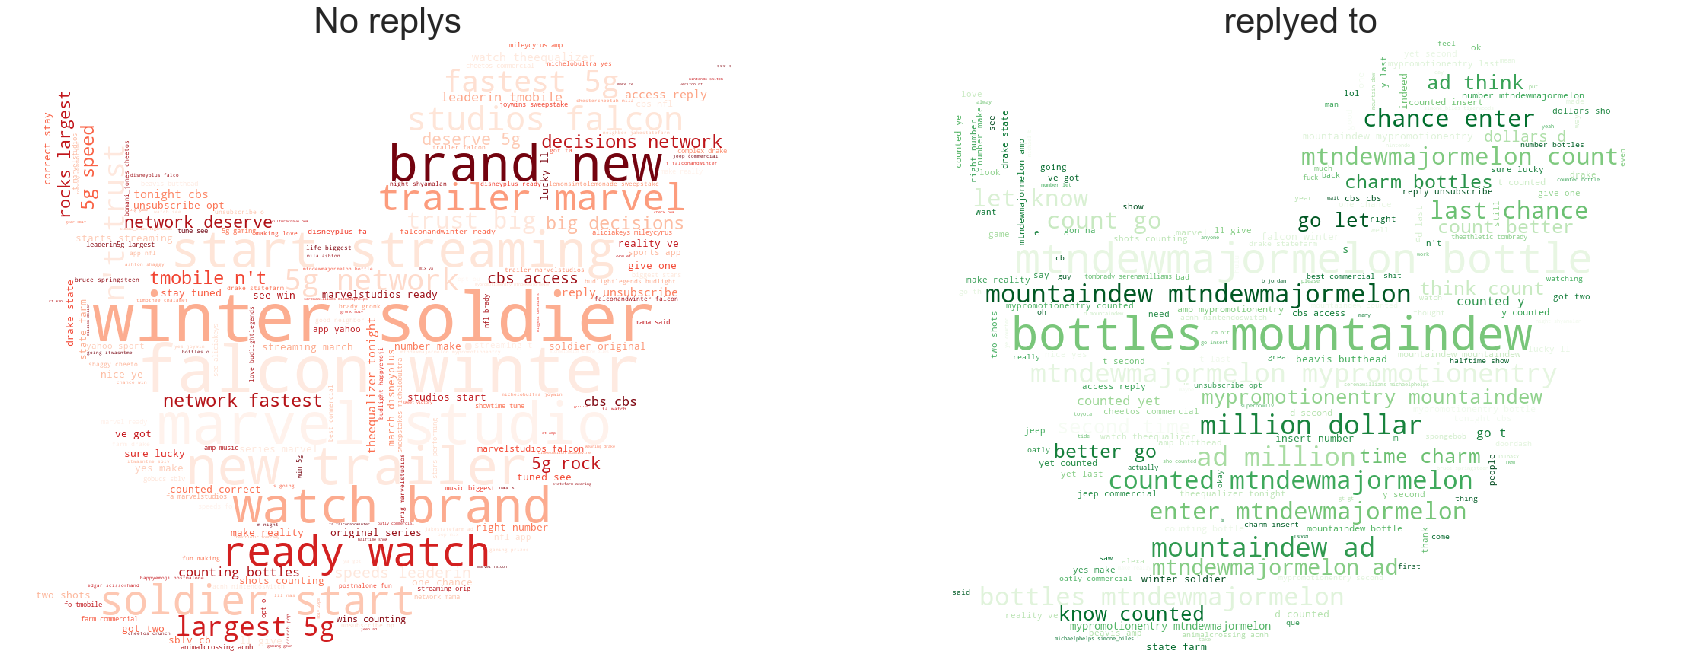

In [123]:
bird = np.array(Image.open('twitter_mask.png'))
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['reply_count']==0]['wordcloud']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('No replys',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['reply_count']>0]['wordcloud']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('replyed to',fontsize=35);

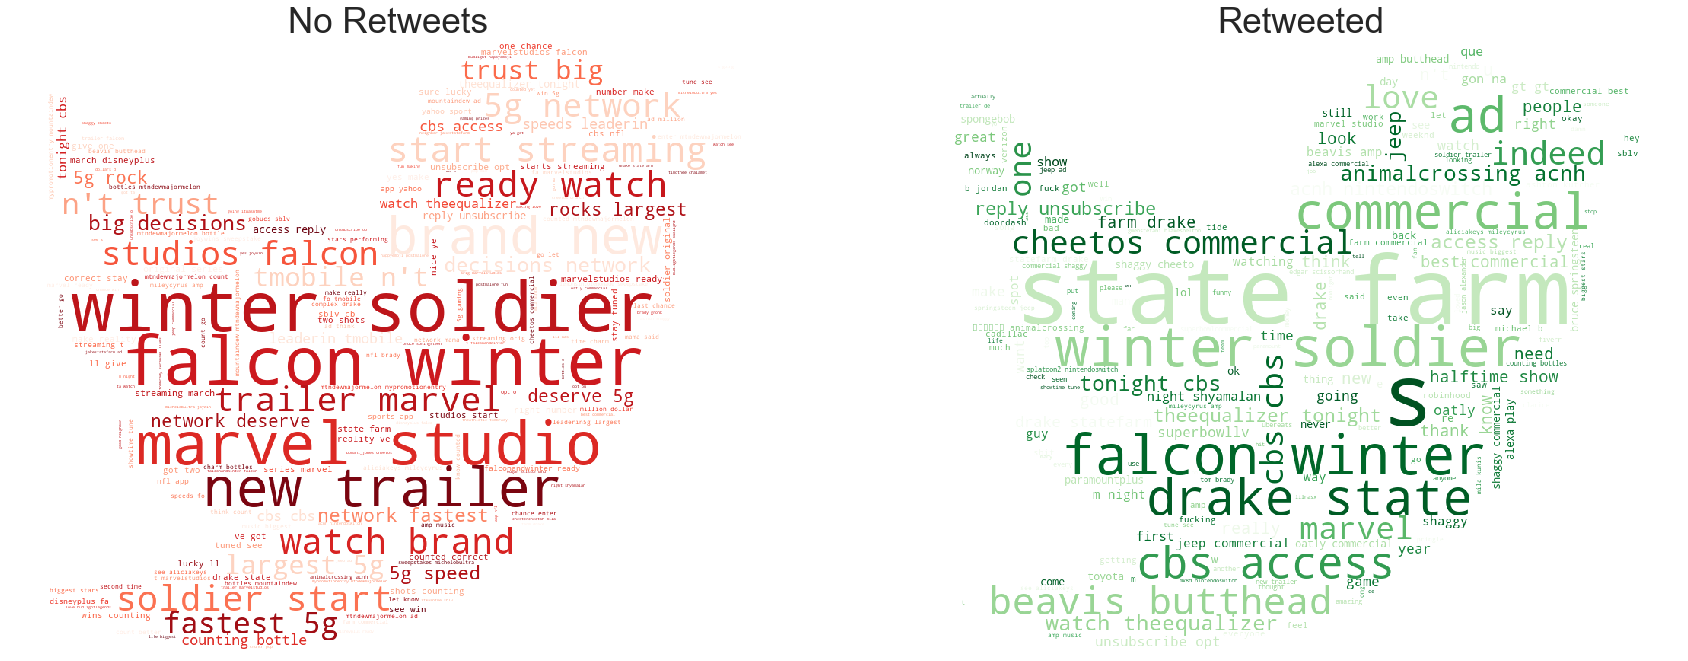

In [124]:
bird = np.array(Image.open('twitter_mask.png'))
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['retweet_count']==0]['wordcloud']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('No Retweets',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['retweet_count']>0]['wordcloud']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Retweeted',fontsize=35);

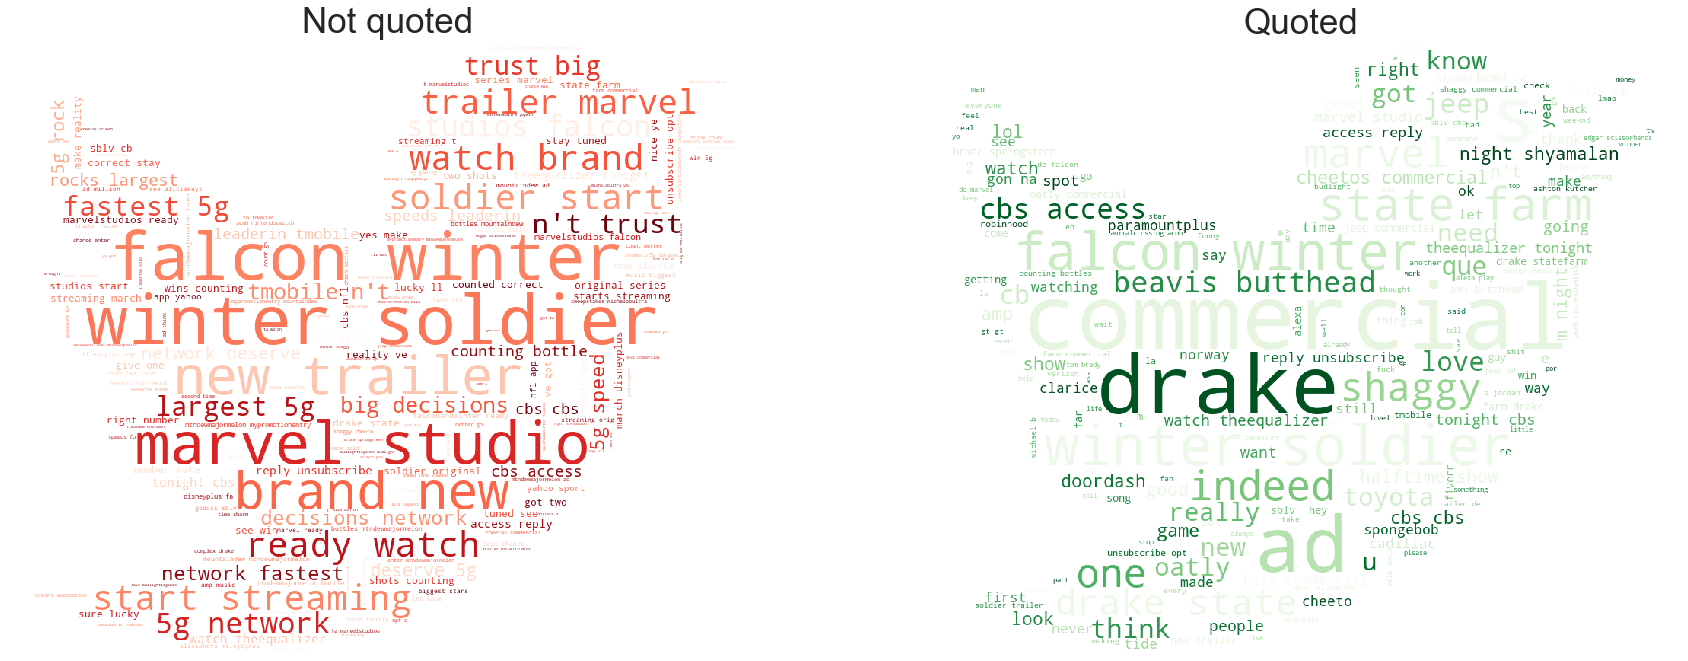

In [125]:
bird = np.array(Image.open('twitter_mask.png'))
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['quote_count']==0]['wordcloud']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not quoted',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['quote_count']>0]['wordcloud']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Quoted',fontsize=35);

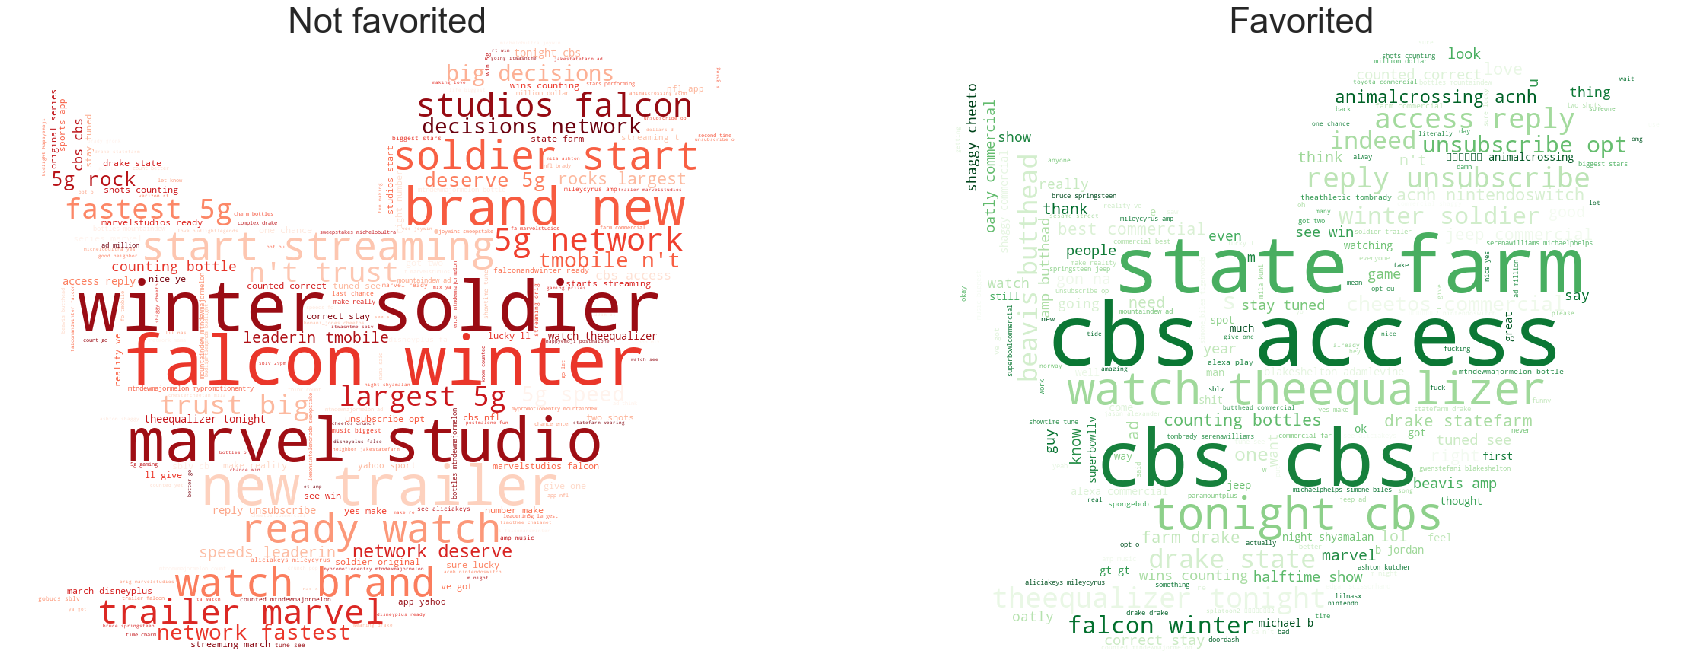

In [126]:
bird = np.array(Image.open('twitter_mask.png'))
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud2 = WordCloud( background_color='white',mask=bird,colormap="Reds",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['favorite_count']==0]['wordcloud']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not favorited',fontsize=35);

wordcloud3 = WordCloud( background_color='white',mask=bird,colormap="Greens",
                        width=600,
                        height=400).generate(" ".join(tweets[tweets['favorite_count']>0]['wordcloud']))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Favorited',fontsize=35);

### TextBlob

In [57]:
from textblob import TextBlob

In [70]:
tweets['textBlob'] = tweets['text'].progress_apply(lambda x: TextBlob(x))


100%|██████████| 1135050/1135050 [00:10<00:00, 103266.30it/s]


In [77]:
tweets['polarity'] = tweets['textBlob'].progress_apply(lambda x: x.sentiment[0])


100%|██████████| 1135050/1135050 [04:04<00:00, 4642.62it/s] 


In [81]:
tweets['sentSubjectivity'] = tweets['textBlob'].progress_apply(lambda x: x.sentiment[1])


100%|██████████| 1135050/1135050 [00:07<00:00, 151825.09it/s]


In [76]:
tweets.iloc[2].textBlob.sentiment

Sentiment(polarity=-0.1, subjectivity=0.25)

In [82]:
tweets[['id', 'text', 'polarity', 'sentSubjectivity']].to_csv("sentiment.csv")

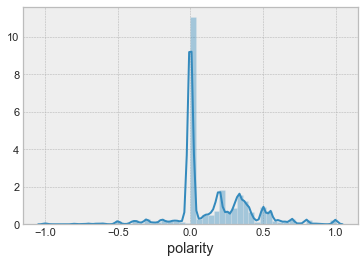

In [80]:
sns.distplot(tweets['polarity'])

## Prepare tfidf

In [ ]:
#### FROM https://www.kaggle.com/youben/twitter-sentiment-analysis ####
# We need to do some preprocessing of the tweets.
# We will delete useless strings (like @, # ...)
# because we think that they will not help
# in determining if the person is Happy/Sad

class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        # mark emoticons as happy or sad
        X = X.str.replace(HAPPY_EMO, " happyemoticons ")
        X = X.str.replace(SAD_EMO, " sademoticons ")
        X = X.str.lower()
        return X

In [ ]:
# This is the pipeline that will transform our tweets to something eatable.
# You can see that we are using our previously defined stemmer, it will
# take care of the stemming process.
# For stop words, we let the inverse document frequency do the job
from sklearn.model_selection import train_test_split

sentiments = train_data['Sentiment']
tweets = train_data['SentimentText']

# I get those parameters from the 'Fine tune the model' part
vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
pipeline = Pipeline([
    ('text_pre_processing', TextPreProc(use_mention=True)),
    ('vectorizer', vectorizer),
])

# Let's split our data into learning set and testing set
# This process is done to test the efficency of our model at the end.
# You shouldn't look at the test data only after choosing the final model
learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)

# This will tranform our learning data from simple text to vector
# by going through the preprocessing tranformer.
learning_data = pipeline.fit_transform(learn_data)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

models = {
    'logitic regression': lr,
    'bernoulliNB': bnb,
    'multinomialNB': mnb,
}

for model in models.keys():
    scores = cross_val_score(models[model], learning_data, sentiments_learning, scoring="f1", cv=10)
    print("===", model, "===")
    print("scores = ", scores)
    print("mean = ", scores.mean())
    print("variance = ", scores.var())
    models[model].fit(learning_data, sentiments_learning)
    print("score on the learning data (accuracy) = ", accuracy_score(models[model].predict(learning_data), sentiments_learning))
    print("")

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(learn_data, sentiments_learning)
print(grid_search.best_params_)

In [ ]:
mnb.fit(learning_data, sentiments_learning)

In [ ]:
testing_data = pipeline.transform(test_data)
mnb.score(testing_data, sentiments_test)


In [ ]:
# Predecting on the test.csv
sub_data = pd.read_csv("../input/test.csv", encoding='ISO-8859-1')
sub_learning = pipeline.transform(sub_data.SentimentText)
sub = pd.DataFrame(sub_data.ItemID, columns=("ItemID", "Sentiment"))
sub["Sentiment"] = mnb.predict(sub_learning)
print(sub)



In [ ]:
# Just run it
model = MultinomialNB()
model.fit(learning_data, sentiments_learning)
tweet = pd.Series([input(),])
tweet = pipeline.transform(tweet)
proba = model.predict_proba(tweet)[0]
print("The probability that this tweet is sad is:", proba[0])
print("The probability that this tweet is happy is:", proba[1])



## TextBlob

In [ ]:
### FROM https://www.justintodata.com/twitter-sentiment-analysis-python/#step-3-process-the-data-and-apply-the-textblob-model

# The column user is in dictionary format. This function unpacks it into 4 separate columns.
def flatten_user_info(df):
    def unpack_user(d):
        return d.get('id'), d.get('name'), d.get('screen_name'), d.get('location')
    return pd.DataFrame(df['user'].map(unpack_user).to_list(), index=df.index)


def get_full_text(df):
    def unpack_extended_tweet(d):
        if not isinstance(d,dict):
            return None
        return d.get('full_text')    
    
    return df['extended_tweet'].map(unpack_extended_tweet)

def get_sentiment(df, txt_col):
    return df[txt_col].map(lambda txt: TextBlob(txt).sentiment.polarity)


def prepare_data(df):
    # filter out retweets. We're only interested in the originals.
    msk = (~df['text'].str.startswith('RT'))
    df_filtered = df[msk].copy()
    
    # get the user information in separate columns.
    df_filtered[['user_id', 'username', 'user_screen_name', 'user_location']] = flatten_user_info(df_filtered)
    
    # get the full_text if it exists. Otherwise fill it in with the text.
    df_filtered['full_text'] = get_full_text(df_filtered)
    msk = df_filtered['full_text'].isnull()
    df_filtered.loc[msk, 'full_text'] = df_filtered.loc[msk, 'text']
    
    # get the sentiment of the full_text.
    df_filtered['textblob_sentiment'] = get_sentiment(df_filtered, 'full_text')
    return df_filtered
    

In [ ]:
tweets_text = prepare_data(tweets)

tweets_text.info()

tweets_text.head()